In [1]:
import os
import wfdb
import neurokit2 as nk
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
# folder path
dir_path = "D:/RA/Project/Working-with-CPSC-2021-Dataset/PAC"
count=0
for root_dir, cur_dir, files in os.walk(f'{dir_path}'):
    count += len(files)
print('file count:', count)

file count: 18084


In [11]:
image_files = [f for f in os.walk(dir_path) ]
image_files

[('D:/RA/Project/Working-with-CPSC-2021-Dataset/PAC',
  ['data_100_2',
   'data_100_3',
   'data_100_4',
   'data_100_5',
   'data_100_6',
   'data_100_7',
   'data_103_2',
   'data_103_3',
   'data_104_15',
   'data_104_21',
   'data_104_9',
   'data_17_12',
   'data_19_2',
   'data_19_3',
   'data_19_4',
   'data_19_6',
   'data_19_8',
   'data_19_9',
   'data_1_1',
   'data_1_2',
   'data_1_3',
   'data_1_5',
   'data_1_6',
   'data_1_7',
   'data_1_8',
   'data_1_9',
   'data_25_12',
   'data_31_16',
   'data_31_17',
   'data_31_19',
   'data_31_21',
   'data_31_8',
   'data_39_21',
   'data_3_2',
   'data_40_2',
   'data_40_4',
   'data_40_5',
   'data_44_17',
   'data_45_10',
   'data_45_2',
   'data_45_4',
   'data_45_5',
   'data_45_7',
   'data_45_8',
   'data_45_9',
   'data_46_9',
   'data_48_19',
   'data_48_20',
   'data_48_21',
   'data_48_22',
   'data_48_23',
   'data_48_24',
   'data_50_6',
   'data_60_4',
   'data_60_6',
   'data_61_2',
   'data_61_3',
   'data_61_4',

In [14]:
def predict_class_with_folder(model, folder_path=None, arr_type=None):
    # Get a list of all image files in the folder
    image_folder = folder_path
    image_files = [os.path.join(image_folder, d, f) 
               for d, ds, fs in os.walk(image_folder) for f in fs]
    true_classes = []
    predicted_classes = []
    # Iterate through the images
    for image_file in image_files:
        
        # Load the image
        img = tf.keras.preprocessing.image.load_img(image_file, target_size=(224, 224))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = tf.expand_dims(img, 0)

        # Run the image through the model
        predictions = model.predict(img)

        # Get the index of the class with the highest probability
        class_idx = tf.argmax(predictions[0])

        # Map the index to the corresponding class label
        class_labels = ["AF","NSR","PAC","PVC"]
        class_label = class_labels[class_idx]
        predicted_classes.append(class_label)

        # Get the true class label from the file name
        #true_label = image_file.split("_")[0]
        true_label=arr_type
        true_classes.append(true_label)

    # Generate the confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes, labels=class_labels)
    cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return predicted_classes

1/1 [==============================] - 0s 83ms/step


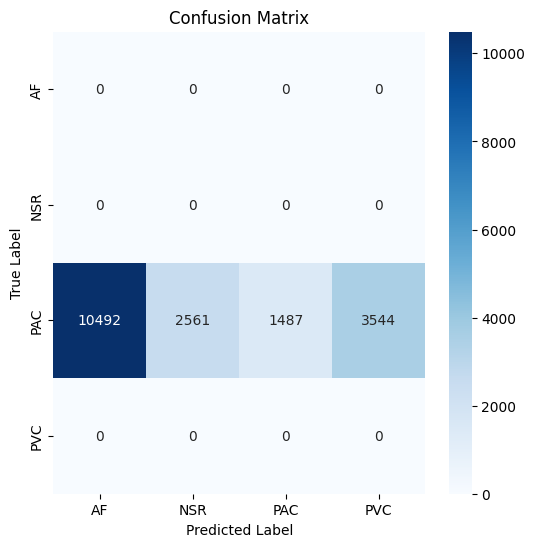

In [16]:
model = tf.keras.models.load_model("D:\\GPU\\Model Training and Testing\\WithD5\\h5models\\EFN1519.h5")
predicted_classes=predict_class_with_folder(model=model,
                                            folder_path="D:\\RA\\Project\\Working-with-CPSC-2021-Dataset\\PAC",
                                            arr_type="PAC")